# Code to test methods of recovering sparse matrices

In [1]:
from factor_rotation import rotate_factors
import numpy as np

from janelia_core.visualization.matrix_visualization import cmp_n_mats

In [2]:
n_rows = 100
n_cols = 2

In [3]:
# Generate a sparse matrix
m_true = np.random.rand(n_rows, n_cols)
m_true[m_true < .5] = 0

In [4]:
# Generate transformatin matrix
t_true = np.random.randn(n_cols, n_cols)

In [5]:
# Get transformed matrix
m_true_trans = np.matmul(m_true, t_true)

In [6]:
# Try to recover the original matrix
m_est, t_est = rotate_factors(m_true_trans,'varimax')

for i in range(n_cols):
    m_est[:, i] = m_est[:, i]/np.sqrt(np.sum(m_est[:, i]**2))

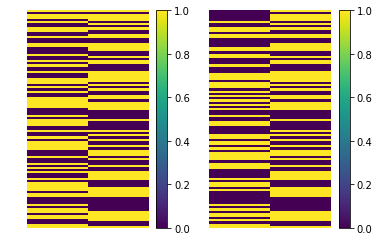

In [7]:
m_true_plot = np.abs(m_true)
m_true_plot[m_true_plot > .1] = 1
m_true_plot[m_true_plot < .1] = 0


m_est_max = np.percentile(np.abs(m_est), 50)
m_est_plot = np.abs(m_est)
m_est_plot[m_est_plot > m_est_max] = 1
m_est_plot[m_est_plot < m_est_max] = 0

cmp_n_mats([m_true_plot, m_est_plot], show_colorbars=True)

In [8]:
np.max(np.abs(m_est))

0.21131760059254143

In [9]:
m_est_max = np.percentile(np.abs(m_est), .5)

In [10]:
np.percentile(np.abs(m_est), 150)

ValueError: Percentiles must be in the range [0, 100]